### Punto 4

Se quiere solucionar de forma analítica la ecuación diferencial $$\frac{du}{dt}=u^q, t\in[0,10]$$ para $q=1$ y para $q<1$ y $t(1-q)+1>0$.

- Caso $q=1$: $$\int \frac{du}{u} = \int t dt \iff \ln{(u)} = t \iff u = e^t.$$ Por lo que la solución es $u(t)=e^t$. Note que si $t=0$ entonces el valor de $u(t=0)=1$, esto será de utilidad para el siguiente caso.

- Caso $q<1$ y $(t(1-q)+1)>0$: $$\int \frac{du}{u^q} = \int t dt \iff \frac{u^{1-q}}{1-q}+c=t \iff u=(t(1-q)+c)^{\frac{1}{1-q}}.$$ Tomando la condición de $u(t=0)=1$ se tiene que $c=1$. $$\therefore u(t)=(t(1-q)+1)^{\frac{1}{1-q}}$$

### Punto 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = np.array([0., 0.2, 0.4, 0.7, 0.9, 1.])
N=1000
t = np.linspace(0,10,N)


In [3]:
def f(u,q):
    dudt = u**q
    return dudt

In [4]:
def Exacta(q,t):
    
    for i in range(len(t)):
        
        if q==1:
            u = np.exp(t)
        else:
            u = ((1-q)*t+1)**(1/(1-q))
    return u          

In [5]:
def RK4(f,q, t):
    h=t[1]-t[0]
    y = np.zeros_like(t)
    y[0] = 1
    for i in range(1,len(y)):
        
        k1 = f(y[i-1],q)
        k2 = f(y[i-1] + h*k1/2, q)
        k3 = f(y[i-1] + h*k2/2, q)
        k4 = f(y[i-1] + h*k3, q)
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)
    
    return y

In [6]:
Sol=[]
for i in range(len(q)):
    Sol.append(RK4(f,q[i], t ))


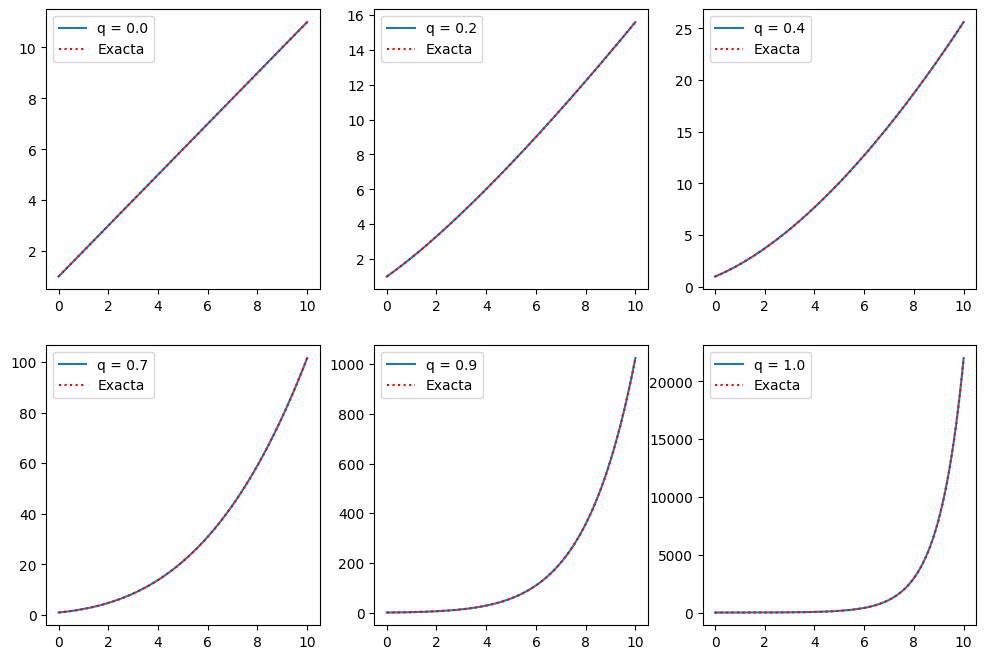

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten() 
for i, ax in enumerate(axs):
    fig = plt.figure(figsize=(4,4))
    ax.plot(t,Sol[i], label = ('q = '+str(q[i])) )
    ax.plot(t, Exacta(q[i], t), color='r', linestyle='dotted', label = 'Exacta')
    ax.legend()
    #plt.plot(t, Sol[i])
    #plt.show()